[PCA数学原理](http://blog.codinglabs.org/articles/pca-tutorial.html)

# 使用梯度上升法求解主成分

![title](PCA1.png)

<img src="PCA2.png" width="50%">

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# 由于 %matplotlib inline 的存在，当输入plt.plot(x,y_1)后，不必再输入 plt.show()，图像将自动显示出来

In [2]:
x = np.empty((100,2))
x[:,0] = np.random.uniform(0., 100, size=100)
x[:,1] = 0.75*x[:,0] +3. + np.random.normal(0, 10, size=100)

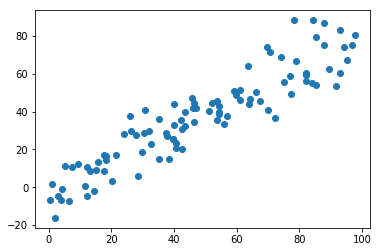

In [3]:
plt.scatter(x[:,0], x[:,1])
plt.show()

## demean(让期望为0)

In [4]:
def demean(x):
    return x - np.mean(x, axis=0) 
# 这个向量每一列的均值
    

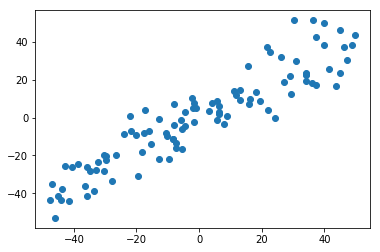

In [5]:
x_demean = demean(x)
plt.scatter(x_demean[:,0], x_demean[:,1])
plt.show()

In [6]:
np.mean(x_demean[:,0])

2.6290081223123707e-15

In [7]:
np.mean(x_demean[:,1])

6.679101716144941e-15

## 梯度上升法

In [8]:
def f(w, x):
    return np.sum((x.dot(w)**2))/len(x)
# 目标函数

In [9]:
def df_math(w, x):
    return x.T.dot(x.dot(w)) * 2 / len(x) 
# 梯度求导  

In [10]:
def  df_debug(w, x, epslion = 0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epslion
        w_2 = w.copy()
        w_2[i] -= epslion
        res[i] = (f(w_1, x) - f(w_2, x)) / (2 *  epslion)
    return res


In [11]:
def direction(w):
    return w / np.linalg.norm(w)
    # w 成为一个单位向量,模为1
    
def gradient_ascent(df, x , initial_w, eta, n_iters = 1e4, epsilon = 1e-8):
    cur_iter = 0
    w = direction(initial_w)
    
    while cur_iter < n_iters:
        gradient = df(w, x)
        last_w = w 
        
        w = w + eta * gradient
        w = direction(w) #每一次运算，w都归为一个单位向量
        if (abs(f(w,x) - f(last_w, x)) < epsilon):
            break
            
        cur_iter += 1
        
    return w
    

In [12]:
initial_w = np .random.random(x.shape[1])
# 不能从0向量开始
initial_w

array([0.91816528, 0.7266673 ])

In [13]:
eta = 0.001

In [14]:
#  不能使用StandardScaler标准化数据，
# 标准化之后方差就为1 了，max方差就不存在了

In [15]:
gradient_ascent(df_debug, x_demean, initial_w, eta)

array([0.75185513, 0.65932834])

In [16]:
gradient_ascent(df_math, x_demean, initial_w, eta)

array([0.75185513, 0.65932834])

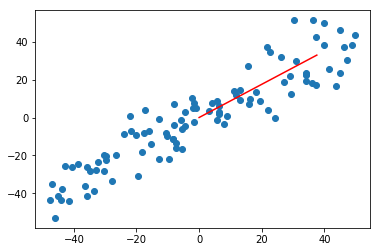

In [17]:
w = gradient_ascent(df_math, x_demean, initial_w ,eta)
plt.scatter(x_demean[:,0], x_demean[:,1])
plt.plot([0, w[0]*50],[0, w[1]*50], color = "r")
plt.show()

<img src="PCA3.png" width="50%">

## 求前n主成分

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
x = np.empty((100,2))
x[:,0] = np.random.uniform(0., 100, size=100)
x[:,1] = 0.75*x[:,0] +3. + np.random.normal(0, 10, size=100)

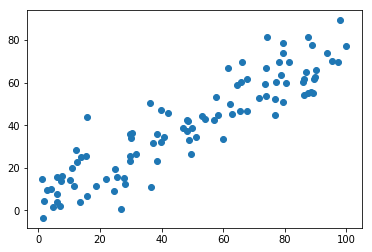

In [20]:
plt.scatter(x[:,0], x[:,1])
plt.show()

In [21]:
def f(w, x):
    return np.sum((x.dot(w)**2))/len(x) # 目标函数

def df(w, x):
    return x.T.dot(x.dot(w)) * 2 / len(x) # 梯度求导  

def direction(w):
    return w / np.linalg.norm(w)
    # w 成为一个单位向量,模为1
    
def first_component( x , initial_w, eta, n_iters = 1e4, epsilon = 1e-8):
    cur_iter = 0
    w = direction(initial_w)
    
    while cur_iter < n_iters:
        gradient = df(w, x)
        last_w = w 
        
        w = w + eta * gradient
        w = direction(w) #每一次运算，w都归为一个单位向量
        if (abs(f(w,x) - f(last_w, x)) < epsilon):
            break
            
        cur_iter += 1
        
    return w
    

In [22]:
initial_w = np .random.random(x.shape[1])
eta = 0.01
w = first_component(x, initial_w, eta)
w

array([0.78029674, 0.62540946])

In [23]:
x2 = np.empty(x.shape)
for i in range(len(x)):
    x2[i] = x[i] - x[i].dot(w) *  w


In [24]:
# x2 = x - x.dot(w).reshape(-1,1)*w

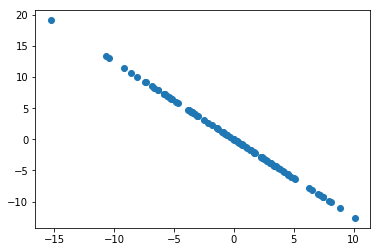

In [25]:
plt.scatter(x2[:,0],x2[:,1])
plt.show()

In [26]:
w2 = first_component(x2, initial_w, eta)
w2

array([ 0.62541221, -0.78029454])

In [27]:
w.dot(w2)

3.528753024284459e-06

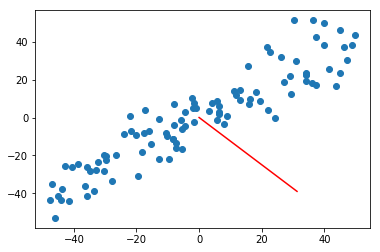

In [28]:
plt.scatter(x_demean[:,0], x_demean[:,1])
plt.plot([0, w2[0]*50],[0, w2[1]*50], color = "r")
plt.show()

In [29]:
def first_n_component(n, x, eta=0.01, n_iters = 1e4, epsilon =1e8):
    
    x_pca = x.copy()
    x_pca = demean(x_pca)
    res = []
    for i in range(n):
        initial_w = np.random.random(x_pca.shape[1])
        w = first_component(x_pca, initial_w, eta)
        res.append(w)
        
        x_pca = x_pca - x_pca.dot(w).reshape(-1,1) * w
        
    return res

In [30]:
first_n_component(2,x)

[array([0.79728273, 0.60360603]), array([ 0.6036112 , -0.79727882])]